Team:
Abhishek Singh ,
Wilson Dsouza ,
Sumit Sinha

Project 2 - Part 3

In [ ]:
pip install shap

     |████████████████████████████████| 327kB 11.8MB/s 
  Created wheel for shap: filename=shap-0.37.0-cp36-cp36m-linux_x86_64.whl size=463910 sha256=a8378ef7836746eb449f7c25f8cb44d99dba97b5d30052aa73354b7ef5097e42
  Stored in directory: /root/.cache/pip/wheels/df/ad/b0/aa7815ec68850d66551ef618095eccb962c8f6022f1d3dd989
Successfully built shap


In [ ]:
import tensorflow.compat.v1.keras.backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import keras.backend as K
import numpy as np
import json
import shap


In [ ]:
%ls

model20201120-213705.h5  sample_data/


In [ ]:
import h5py

In [ ]:
# load pre-trained model in Part 1 and choose two images to explain
# model model20201120-213705.h5
# In order to run this / replicate please place the trained model in the pwd (contents)
import h5py
from keras.models import load_model
model = load_model('model20201120-213705.h5')

X,y = shap.datasets.imagenet50()
to_explain = X[[40,42]]

In [ ]:
# load the ImageNet class names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
fname = shap.datasets.cache(url)
with open(fname) as f:
    class_names = json.load(f)

In [ ]:
# explain how the input to the 7th layer of the model explains the top two classes
import tensorflow.compat.v1.keras.backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
def map2layer(x, layer):
    feed_dict = dict(zip([model.layers[0].input], [preprocess_input(x.copy())]))
    return K.get_session().run(model.layers[layer].input, feed_dict)
e = shap.GradientExplainer(
    (model.layers[9].input, model.layers[-1].output),
    map2layer(X, 9),
    local_smoothing=0 # std dev of smoothing noise
)
shap_values,indexes = e.shap_values(map2layer(to_explain, 9), ranked_outputs=2)

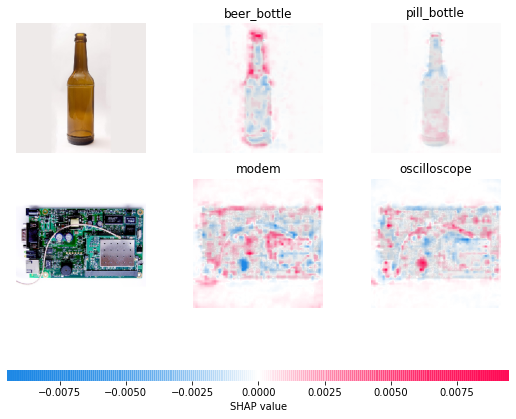

In [ ]:
# get the names for the classes
index_names = np.vectorize(lambda x: class_names[str(x)][1])(indexes)

# plot the explanations
shap.image_plot(shap_values, to_explain, index_names)

As we see above the predictions for two input images are explained in the plot . The red pixels represent positive SHAP values that increase the probability of the class, while blue pixels represent negative SHAP values the reduce the probability of the class. Since we are using ranked_outputs=2 we explain only the two most likely classes for each input.
1) For the first impage we see the most likely classification is beer bottle and pill bottle.
2) For the second image we we see the most likely classification is modem and oscilloscope.